<a href="https://colab.research.google.com/github/Armin-Abdollahi/Iris-Flower-Classification/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
# Load Data
data = load_iris()

In [3]:
# Exploring Data
labels = data['target_names']
description = data['DESCR']
feature_names = data['feature_names']

print(f"This is a dataset with {len(data.data)} samples.\n{len(labels)} classes.\n{len(feature_names)} features for each sample.")
print(f"Feature names: {feature_names}")
print(f"Label Names:{labels}")
print(f"---------\nSample input feature vector: {data['data'][0]}\nLabel: {data['target'][0]}")

This is a dataset with 150 samples.
3 classes.
4 features for each sample.
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Label Names:['setosa' 'versicolor' 'virginica']
---------
Sample input feature vector: [5.1 3.5 1.4 0.2]
Label: 0


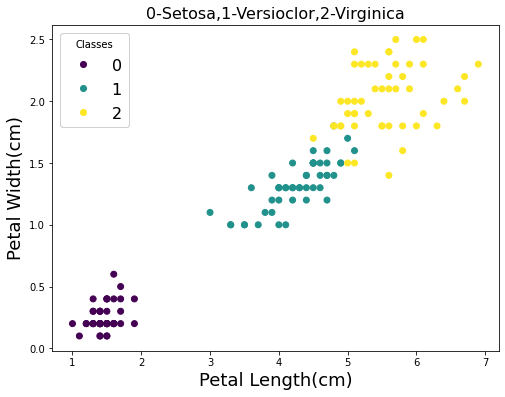

In [4]:
# Seeing if the data is linearly seperable or not
x, y = data['data'][:,2],data['data'][:,3] # petal length and petal width 
c = data['target']

fig, ax = plt.subplots(figsize=(8,6))
scatter = ax.scatter(x, y, c=c,label='x')

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="best", title="Classes",fontsize=16)
ax.add_artist(legend1)
plt.title("0-Setosa,1-Versioclor,2-Virginica",fontsize=16)
plt.xlabel('Petal Length(cm)',fontsize=18)
plt.ylabel('Petal Width(cm)',fontsize=18)
plt.show()

In [5]:
# 3-D Plot
c = []
for i in data['target']:
    if i == 0:
        c.append('red')
    elif i==1:
        c.append('green')
    else:
        c.append('blue')

In [6]:
data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

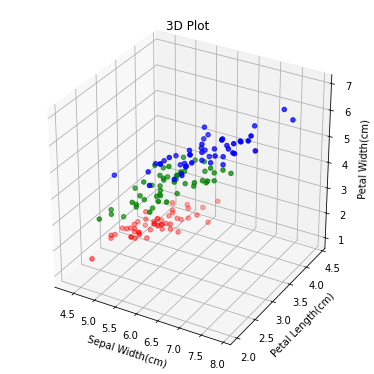

In [7]:
fig = plt.figure(figsize=(5,5))
ax = mplot3d.Axes3D(fig)

# Data for a three-dimensional line
sepal_width,petal_length,petal_width  = data['data'][:,0],data['data'][:,1],data['data'][:,2]
plt.title('3D Plot')
ax.set_xlabel('Sepal Width(cm)')
ax.set_ylabel('Petal Length(cm)')
ax.set_zlabel('Petal Width(cm)')
ax.scatter(sepal_width,petal_length,petal_width,c=c)


plt.show()

In [8]:
# Binary classifier
# for this simplistic example I am just using one feature: sepal length
x = data['data'][:,:2]
y = (data['target']==0).astype('int')

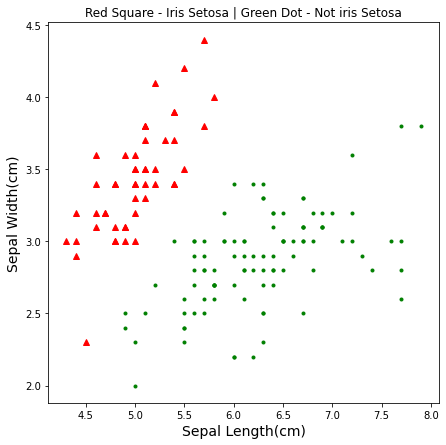

In [9]:
# rough plot to see what we're dealing with 
plt.figure(figsize=(7,7))
for i in range(len(x)):
    if y[i] == 1:
        c = 'red'
        marker = '^'
    else:
        c = 'green'
        marker = '.'
    plt.plot(x[i,0],x[i,1],c=c,marker=marker)
plt.xlabel('Sepal Length(cm)',fontsize=14)
plt.ylabel('Sepal Width(cm)',fontsize=14)
plt.title("Red Square - Iris Setosa | Green Dot - Not iris Setosa",fontsize=12)
plt.show()

In [10]:
lr_binary = LogisticRegression() 
lr_binary.fit(x,y)

LogisticRegression()

In [11]:
# Exploring attributes of the LogisticRegression() object
lr_binary.__dict__

{'penalty': 'l2',
 'dual': False,
 'tol': 0.0001,
 'C': 1.0,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'class_weight': None,
 'random_state': None,
 'solver': 'lbfgs',
 'max_iter': 100,
 'multi_class': 'auto',
 'verbose': 0,
 'warm_start': False,
 'n_jobs': None,
 'l1_ratio': None,
 'n_features_in_': 2,
 'classes_': array([0, 1]),
 'n_iter_': array([23], dtype=int32),
 'coef_': array([[-3.38829757,  3.1645277 ]]),
 'intercept_': array([8.32330389])}

In [12]:
# let us check the score now
lr_binary.score(x,y)

1.0

In [13]:
# Using a single feature + labels are iris setosa and not iris setosa
sepal_l = data['data'][:,0] #sepal length

In [14]:
single_feature_lr_binary = LogisticRegression()

In [15]:
single_feature_lr_binary.fit(sepal_l.reshape(-1,1),y)

LogisticRegression()

In [16]:
y_probab = single_feature_lr_binary.predict_proba(np.linspace(4.5,8.0,1000).reshape(-1,1))

In [17]:
# h(x) = theta_0 + theta_1*X
theta_0,theta_1 = single_feature_lr_binary.intercept_,single_feature_lr_binary.coef_
print(theta_0.shape)
print(theta_1.shape)

(1,)
(1, 1)


In [18]:
single_feature_lr_binary.decision_function(sepal_l[0].reshape(-1,1))

array([0.91116385])

In [19]:
def h(theta_0,theta_1,x):
    return theta_0 + theta_1*x

In [20]:
single_feature_lr_binary.decision_function([[4.5],[8]])

array([ 2.98579885, -9.11623862])

In [21]:
single_feature_lr_binary.score(sepal_l.reshape(-1,1),y)

0.8933333333333333

In [22]:
# 0.893 is not really a good score, so let us try to tweak our model to make this score better..

In [23]:
# new regularization constant 
lr_single_feature_high_regularization = LogisticRegression(C=0.5) # C is inverse of Regulariation Strength
lr_single_feature_low_regularization = LogisticRegression(C=10) 
crazy_regularized = LogisticRegression(C=0.01)

In [24]:
lr_single_feature_high_regularization.fit(sepal_l.reshape(-1,1),y)
lr_single_feature_low_regularization.fit(sepal_l.reshape(-1,1),y)

LogisticRegression(C=10)

In [25]:
crazy_regularized.fit(sepal_l.reshape(-1,1),y)

LogisticRegression(C=0.01)

In [26]:
no_regularization = LogisticRegression(C=10**5)

In [27]:
y_prob_high = lr_single_feature_high_regularization.predict_proba(np.linspace(4.5,8.0,1000).reshape(-1,1))
y_prob_low = lr_single_feature_low_regularization.predict_proba(np.linspace(4.5,8.0,1000).reshape(-1,1))

In [28]:
# Comparing three models with different regularization constants

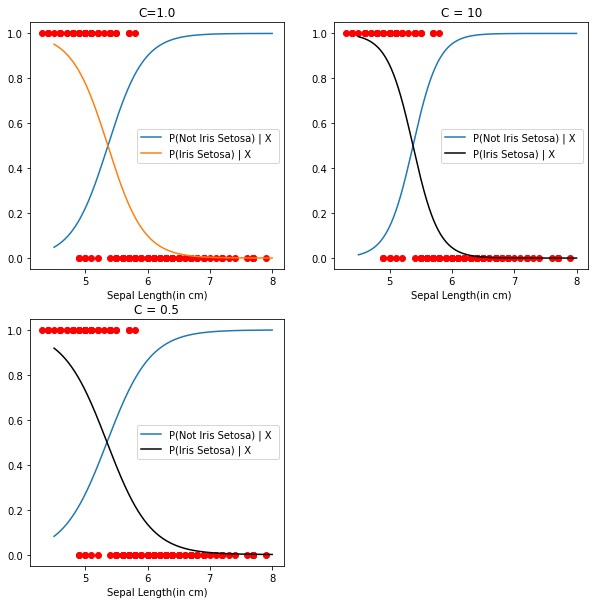

<Figure size 432x288 with 0 Axes>

In [29]:
plt.figure(figsize=(10,10))

plt.subplot(221)
plt.title("C=1.0")
plt.plot(sepal_l,y,'ro')
plt.plot(np.linspace(4.5,8.0,1000),y_probab[:,0],label="P(Not Iris Setosa) | X ")
plt.plot(np.linspace(4.5,8.0,1000),y_probab[:,1],label="P(Iris Setosa) | X ")
plt.legend(loc='best')
plt.xlabel('Sepal Length(in cm)')

# C = 10 , LOW REGULARIZATION 
plt.subplot(222)
plt.title("C = 10")
plt.plot(sepal_l,y,'ro')
plt.plot(np.linspace(4.5,8.0,1000),y_prob_low[:,0],label="P(Not Iris Setosa) | X ")
plt.plot(np.linspace(4.5,8.0,1000),y_prob_low[:,1],label="P(Iris Setosa) | X ",color='black')
plt.legend(loc='best')
plt.xlabel('Sepal Length(in cm)')


# C = 0.5 , HIGH REULARIZATION 
plt.subplot(223)
plt.title("C = 0.5")
plt.plot(sepal_l,y,'ro')
plt.plot(np.linspace(4.5,8.0,1000),y_prob_high[:,0],label="P(Not Iris Setosa) | X ")
plt.plot(np.linspace(4.5,8.0,1000),y_prob_high[:,1],label="P(Iris Setosa) | X ",color='black')
plt.legend(loc='best')
plt.xlabel('Sepal Length(in cm)')
plt.show()

plt.tight_layout()

In [30]:
# scores 
print(lr_single_feature_high_regularization.score(sepal_l.reshape(-1,1),y))
print(lr_single_feature_low_regularization.score(sepal_l.reshape(-1,1),y))

0.8933333333333333
0.8933333333333333


In [31]:
crazy_regularized.score(sepal_l.reshape(-1,1),y)

0.6666666666666666

In [32]:
no_regularization.fit(sepal_l.reshape(-1,1),y)

LogisticRegression(C=100000)

In [33]:
no_regularization.score(sepal_l.reshape(-1,1),y)

0.8933333333333333

In [34]:
# Multi-Class Classification

In [35]:
X = data['data'] # using all 4 features 
y = data['target'] # labels

In [36]:
lr_multi_class = LogisticRegression(multi_class='ovr') # we set the `multi_class` attribute to 'ovr'
lr_multi_class.fit(X,y)

LogisticRegression(multi_class='ovr')

In [37]:
y_hat = lr_multi_class.predict(X) # make predictions

In [38]:
lr_multi_class.score(X,y)

0.9533333333333334

In [39]:
# Visually Inspecting where the model mis-classified instances

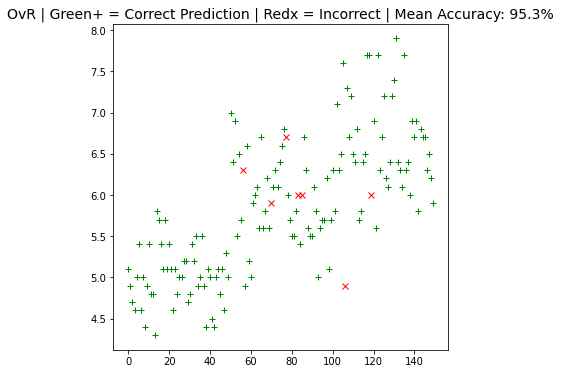

In [40]:
plt.figure(figsize=(6,6))
plt.title("OvR | Green+ = Correct Prediction | Redx = Incorrect | Mean Accuracy: 95.3%",fontsize=14)
for i in range(len(X)):
    # correctly predicted
    if y[i] == y_hat[i]:
        plt.plot(i,X[i,0],'g+')
    else:
        plt.plot(i,X[i,0],'rx')
plt.show()

In [41]:
model = LogisticRegression()
ovo = OneVsOneClassifier(model)
# fit
ovo.fit(X,y)
# score
print("Score:",ovo.score(X,y))
# predictions
y_hat = ovo.predict(X)

Score: 0.9733333333333334


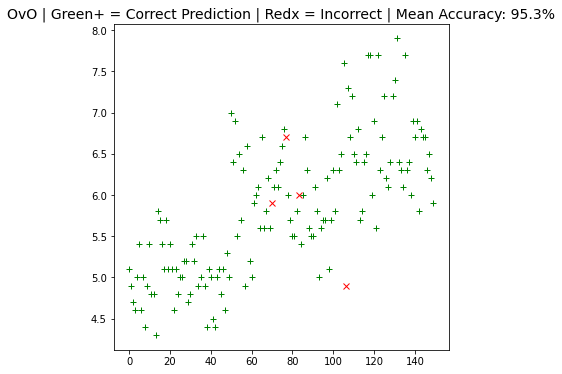

In [42]:
plt.figure(figsize=(6,6))
plt.title("OvO | Green+ = Correct Prediction | Redx = Incorrect | Mean Accuracy: 95.3%",fontsize=14)
for i in range(len(X)):
    # correctly predicted
    if y[i] == y_hat[i]:
        plt.plot(i,X[i,0],'g+')
    else:
        plt.plot(i,X[i,0],'rx')
plt.show()

In [43]:
# 3.Multinomial

In [44]:
lr_muticlasss_multinomial = LogisticRegression(multi_class='multinomial',max_iter=125)
lr_muticlasss_multinomial.fit(X,y)
print(lr_muticlasss_multinomial.score(X,y))

0.9733333333333334


In [45]:
y_hat = lr_muticlasss_multinomial.predict(X)

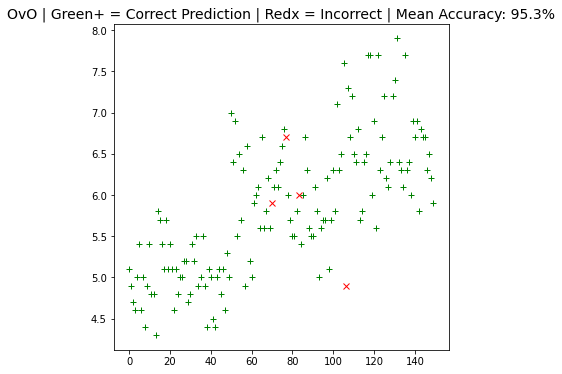

In [46]:
plt.figure(figsize=(6,6))
plt.title("OvO | Green+ = Correct Prediction | Redx = Incorrect | Mean Accuracy: 95.3%",fontsize=14)
for i in range(len(X)):
    # correctly predicted
    if y[i] == y_hat[i]:
        plt.plot(i,X[i,0],'g+')
    else:
        plt.plot(i,X[i,0],'rx')
plt.show()

In [47]:
# Standard Scaler to the rescue!

In [48]:
X_scaled = StandardScaler().fit_transform(X)

In [49]:
X_scaled.std(axis=0)

array([1., 1., 1., 1.])

In [50]:
# 4. One-vs-Rest with Scaled Features

In [51]:
lr_scaled_features = LogisticRegression(multi_class="ovr") # one vs rest
lr_scaled_features.fit(X_scaled,y)

LogisticRegression(multi_class='ovr')

In [52]:
# score on unscale
lr_scaled_features.score(X_scaled,y)

0.9466666666666667

In [53]:
# 5 One-vs-One with scaled features

In [54]:
lr_ovo_scaled = LogisticRegression()
ovo_scaled = OneVsOneClassifier(lr_ovo_scaled)
ovo_scaled.fit(X_scaled,y)

OneVsOneClassifier(estimator=LogisticRegression())

In [55]:
ovo_scaled.score(X_scaled,y)

0.9733333333333334

In [56]:
# 6. Mutlinomial with scaled features

In [57]:
lr_scaled_multinomial = LogisticRegression(multi_class="multinomial")
lr_scaled_multinomial.fit(X_scaled,y)
lr_scaled_multinomial.score(X_scaled,y)

0.9733333333333334